In [1]:
%run config.py

In [2]:
# optimal value should be a float bounded by 0 and 1
# if no value given then will be empirically determined from data
optimal_cutoff_business_input = []

In [3]:
listdir(PATH)

['Credit risk assessment.csv',
 '.DS_Store',
 'Readme.md',
 'dev',
 '.ipynb_checkpoints',
 'src']

In [4]:
if 'Credit risk assessment.csv' not in listdir(PATH):
    print("Data is missing")

In [5]:
raw_data = pd.read_csv(f'{PATH}/Credit risk assessment.csv', low_memory = False)

In [6]:
# check column data types

int_cols= []
float_cols = []
cat_cols = []

for column in raw_data.columns:
  if raw_data[column].dtypes==int:
    int_cols.append(column)
  elif raw_data[column].dtypes==float:
    float_cols.append(column)
  else:
    cat_cols.append(column)
    
int_cols.remove('Unnamed: 0') 
int_cols.remove('index')
print(len(int_cols), 'integer columns: ', int_cols)
print( len(float_cols), 'float columns: ', float_cols)
print( len(cat_cols), 'categorical columns: ', cat_cols)

2 integer columns:  ['job_cat', 'duration']
3 float columns:  ['age', 'loan_amount', 'customer_loyalty']
6 categorical columns:  ['gender', 'housing', 'savings', 'checking', 'purpose', 'risk']


In [7]:
null_cols = raw_data.isnull().sum().sort_values(ascending=False)/len(raw_data)

print(len(null_cols[null_cols>0]), 'Columns in Training Dataset Have Missing Value')
print(null_cols[null_cols>0])

4 Columns in Training Dataset Have Missing Value
checking       0.394
savings        0.183
loan_amount    0.041
age            0.013
dtype: float64


In [8]:
toDrop=[]
missing_tolerance = 0.2
for col in [x for x in raw_data.columns if x!='risk']:
  if null_cols[col]>missing_tolerance:
    toDrop.append(col)

print(f'{len(toDrop)} columns has more than 20% missing value: {toDrop}')

cat_cols = [x for x in cat_cols if x not in toDrop]
int_cols = [x for x in int_cols if x not in toDrop]
float_cols = [x for x in float_cols if x not in toDrop]
cat_cols.remove('risk')

1 columns has more than 20% missing value: ['checking']


In [9]:
raw_data.corr()

,Unnamed: 0,index,age,job_cat,loan_amount,duration,customer_loyalty
Unnamed: 0,1.000000,1.000000,-0.012903,-0.027345,0.014909,0.030788,-0.008586
index,1.000000,1.000000,-0.012903,-0.027345,0.014909,0.030788,-0.008586
age,-0.012903,-0.012903,1.000000,0.017788,0.041525,-0.031105,0.982842
job_cat,-0.027345,-0.027345,0.017788,1.000000,0.267665,0.210910,0.017714
loan_amount,0.014909,0.014909,0.041525,0.267665,1.000000,0.626339,0.046811
duration,0.030788,0.030788,-0.031105,0.210910,0.626339,1.000000,-0.032075
customer_loyalty,-0.008586,-0.008586,0.982842,0.017714,0.046811,-0.032075,1.000000


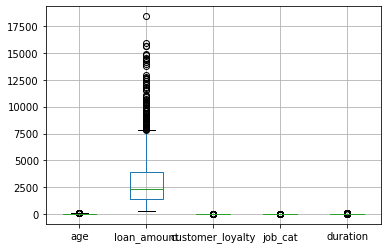

In [10]:
for col in [float_cols + int_cols]:
    raw_data[col].boxplot()

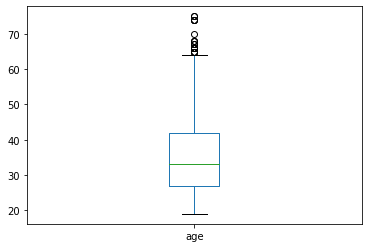

In [11]:
raw_data['age'].plot.box()

In [12]:
raw_data.drop(raw_data[raw_data['age'] > 65].index, inplace = True)

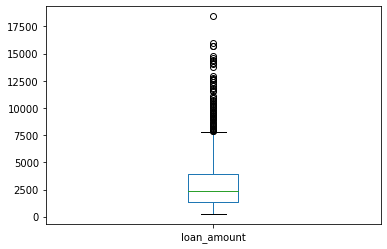

In [13]:
raw_data['loan_amount'].plot.box()

In [14]:
def drop_col(df, col, tolerance):
    '''
    Drop rows from df for a given column based on tolerance
    '''
    df.drop(df[df[col] > tolerance].index, inplace = True)

In [15]:
drop_col(raw_data, 'loan_amount', 7500)

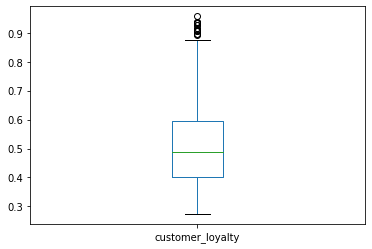

In [16]:
raw_data['customer_loyalty'].plot.box()

In [17]:
drop_col(raw_data,'customer_loyalty', 0.88)

['duration']

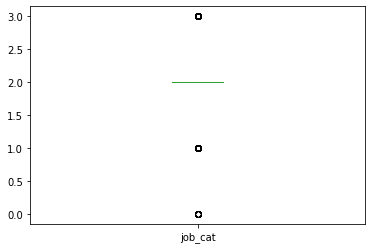

In [18]:
## this should be a categorical variable

raw_data['job_cat'].plot.box()

raw_data.job_cat = raw_data.job_cat.astype(object)
raw_data.dtypes
int_cols.remove('job_cat')
int_cols


In [19]:
cat_cols.append('job_cat')

In [20]:
cat_cols

['gender', 'housing', 'savings', 'purpose', 'job_cat']

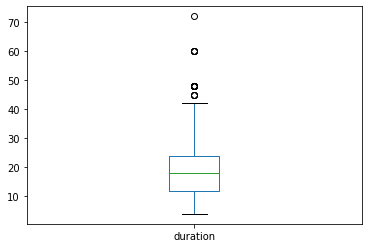

In [21]:
raw_data['duration'].plot.box()

In [22]:
drop_col(raw_data, 'duration', 42)

In [23]:
raw_data.drop('Unnamed: 0', axis = 1, inplace=True)
raw_data.drop('index', axis = 1, inplace = True)
raw_data.drop(toDrop, axis = 1, inplace = True)

In [24]:
#NaN means something

for col in raw_data.columns:
    raw_data[col].fillna('missing', inplace = True)

In [25]:
raw_data.head()

,age,gender,job_cat,housing,savings,loan_amount,duration,purpose,risk,customer_loyalty
2,49,male,1,own,low,2096,12,education,good,0.712806
4,53,male,2,free,low,4870,24,car,bad,0.786086
6,53,male,2,own,very_high,2835,24,furniture/equipment,good,0.725351
7,35,male,3,rent,low,6948,36,car,good,0.539731
9,28,male,3,own,low,5234,30,car,bad,0.465373


In [26]:
# ordinal categorical columns will be replaced manually 

raw_data.housing.value_counts()

own     628
rent    160
free     61
Name: housing, dtype: int64

In [27]:
raw_data.replace({'housing': {'free': 0, 'rent': 1, 'own': 2}}, inplace = True)

In [28]:
raw_data.housing.value_counts()

2    628
1    160
0     61
Name: housing, dtype: int64

In [29]:
raw_data.housing = raw_data.housing.astype(object)

In [30]:
raw_data.savings.value_counts()

low          521
missing      143
moderate      86
very_high     55
high          44
Name: savings, dtype: int64

In [31]:
raw_data.replace({'savings': {'missing': 0, 'low': 1, 'moderate': 2, 'high': 3, 'very_high':4}}, inplace = True)

In [32]:
raw_data.savings.value_counts()

1    521
0    143
2     86
4     55
3     44
Name: savings, dtype: int64

In [33]:
raw_data.replace({'risk': {'good': 0, 'bad': 1}}, inplace = True)

In [34]:
# seems somewhat balanced with respect to outcome of interest coded as 1 for bad risk or 'likely' to default

raw_data.risk.value_counts()/len(raw_data)

0    0.731449
1    0.268551
Name: risk, dtype: float64

In [35]:
numericColumns = []
categoricalColumns = []

for column in [x for x in raw_data.columns if x!='risk']:
  if raw_data[column].dtypes==int or raw_data[column].dtypes==float:
    numericColumns.append(column)
  else:
    categoricalColumns.append(column)

In [36]:
numericColumns

['job_cat', 'savings', 'duration', 'customer_loyalty']

In [37]:
categoricalColumns

['age', 'gender', 'housing', 'loan_amount', 'purpose']

In [38]:
## build preprocessing pipeline

numeric_features = numericColumns
numeric_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy='mean')),
                                      ('scaler', StandardScaler())])


In [39]:
categorical_features = cat_cols
categorical_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                      ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [40]:
preprocessor = ColumnTransformer(
    transformers=[
                  ('num', numeric_transformer, numeric_features),
                  ('cat', categorical_transformer, categorical_features)])

In [41]:
y = raw_data.risk
X = raw_data.drop('risk', axis = 1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [43]:
X_test, X_validate, y_test, y_validate = train_test_split(X_test, y_test, test_size=0.5)

In [44]:
#preprocessor.fit_transform(X_train)

In [45]:
lasso_pipeline = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('lasso_clf', linear_model.LogisticRegression(random_state = 36, max_iter=10000, tol=0.1, verbose = 0))])

In [46]:
C = np.logspace(-4, 4, 100)
penalty = ['l1', 'l2']

lasso_param_grid = dict( 
                  lasso_clf__C=C,
                  lasso_clf__penalty=penalty)

In [47]:
scoring_metric = make_scorer(roc_auc_score, greater_is_better=True)

In [48]:
lasso_grid_search = GridSearchCV(lasso_pipeline,lasso_param_grid , cv = 5, scoring = scoring_metric, verbose = 0)

In [ ]:
lasso_grid_search.fit(X_train, y_train)


print(f"best score is {lasso_grid_search.best_score_}, best parameter from grid search is {lasso_grid_search.best_params_}")

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/h391066/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
Value

In [ ]:
lasso_grid_results = pd.DataFrame(lasso_grid_search.cv_results_)[['mean_test_score', 
                                               'std_test_score',
                                               'param_lasso_clf__penalty',
                                               'params']]
lasso_grid_results.head()

In [ ]:
best_results = pd.DataFrame(lasso_grid_results.loc[lasso_grid_results['mean_test_score'] == lasso_grid_results['mean_test_score'].max()])

In [ ]:
optimal_c = list(best_results.iloc[0].params.values())[0]
optimal_penalty = list(best_results.iloc[0].params.values())[1]

In [ ]:
optimal_c

In [ ]:
# create the model based on optimal L1 penalty
optimal_lasso_pipeline = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('lasso_clf', linear_model.LogisticRegression(C = optimal_c, 
                                                  penalty=optimal_penalty, 
                                                  solver='liblinear',
                                                  random_state = 36, 
                                                  verbose = 1))])


In [ ]:
optimal_lasso_pipeline.fit(X_train, y_train)

In [ ]:
optimal_lasso_pred_proba = pd.Series(optimal_lasso_pipeline.predict_proba(X_validate)[:,1])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_validate, optimal_lasso_pred_proba)

In [ ]:
optimal_cutoff_business_input

In [ ]:
if not optimal_cutoff_business_input:
    optimal_cutoff = thresholds[np.argmax(tpr-fpr)]
else:
    optimal_cutoff = optimal_cutoff_business_input[0]

In [ ]:
optimal_cutoff

In [ ]:
optimal_lasso_pred_proba

In [ ]:
validation_label = optimal_lasso_pred_proba.apply(lambda x: 1 if x > optimal_cutoff else 0)

In [ ]:
target_names = ['risk-good', 'risk-bad']
print(classification_report(y_validate, validation_label, target_names=target_names))

In [ ]:
roc_auc_score(y_validate, validation_label)

In [ ]:
optimal_lasso_test_proba = pd.Series(optimal_lasso_pipeline.predict_proba(X_test)[:,1])

In [ ]:
test_label = optimal_lasso_test_proba.apply(lambda x: 1 if x > optimal_cutoff else 0)

In [ ]:
print(classification_report(y_test, test_label, target_names=target_names))

In [ ]:
roc_auc_score(y_test, test_label)

In [ ]:
total_data_scores = pd.Series(optimal_lasso_pipeline.predict_proba(raw_data.drop('risk', axis = 1))[:,1])

In [ ]:
total_data_labels = total_data_scores.apply(lambda x: 1 if x > optimal_cutoff else 0)

In [ ]:
final_score_data = pd.concat([total_data_scores,total_data_labels], axis=1)


In [ ]:
final_score_data.to_csv("final_scored_data.csv", index = False)